<a href="https://colab.research.google.com/github/gowtham-patnala/Unified_Mentor_Projects/blob/main/Heart_Disease_Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Heart Disease data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.shape

(1025, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

723

In [8]:
data.drop_duplicates(inplace= True)

In [9]:

data.duplicated().sum()

0

In [10]:
data.shape

(302, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [13]:
data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

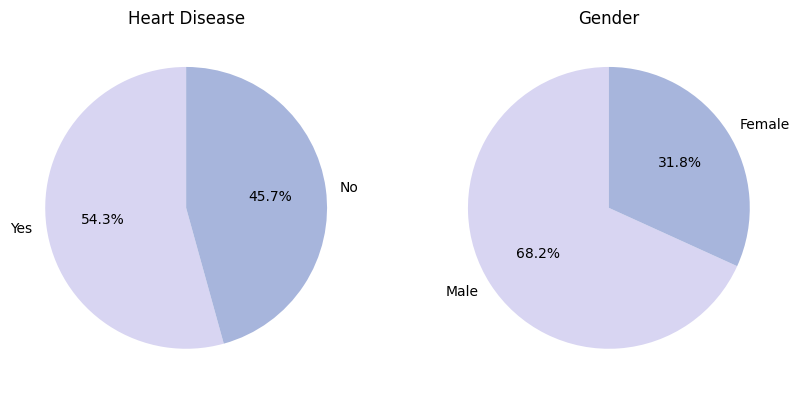

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

# Heart Disease Distribution:

axes[0].pie(data['target'].value_counts(), labels = ['Yes', 'No'], colors = sns.cubehelix_palette(start= 2), autopct= '%.1f%%', startangle= 90)
axes[0].set_title("Heart Disease")

# Gender Distribution:

axes[1].pie(data['sex'].value_counts(), labels= ['Male','Female'], colors = sns.cubehelix_palette(start= 2), autopct= '%.1f%%', startangle= 90)
axes[1].set_title("Gender")

plt.show()

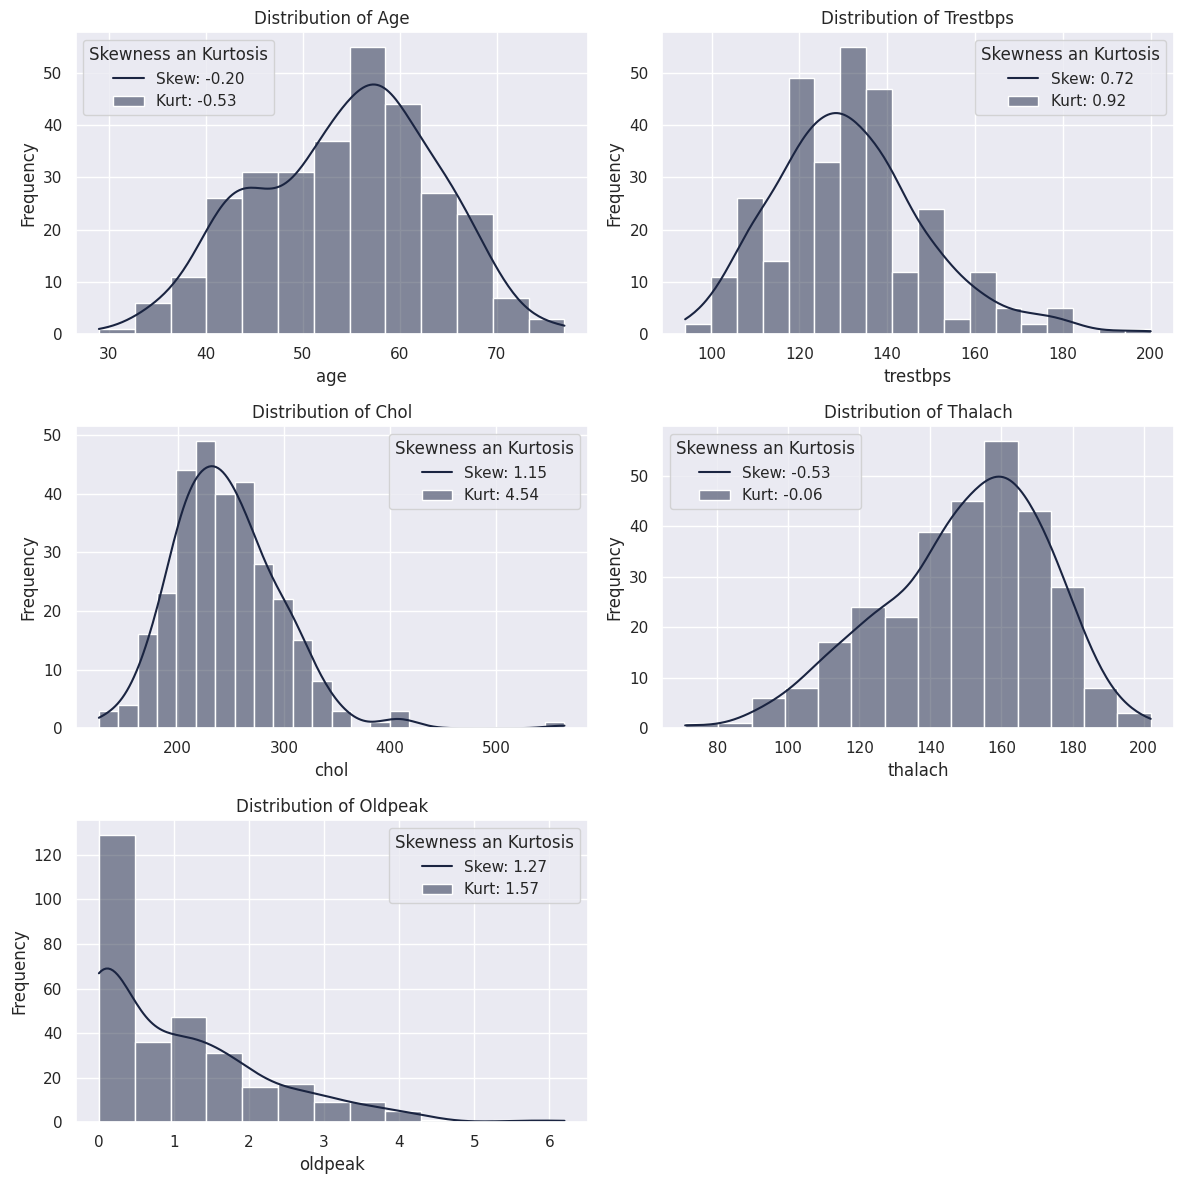

In [15]:
sns.set(style= 'darkgrid')

fig, axes = plt.subplots(3,2,figsize=(12,12))

# Numerical Features of the dataset
Num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for ax, Num_features in zip(axes.flatten(), Num_features):
    sns.histplot(data[Num_features], kde= True, color= sns.color_palette('cubehelix')[0], ax= ax)
    ax.set_title(f'Distribution of {Num_features.capitalize()}')
    ax.set(xlabel= Num_features, ylabel= "Frequency")
    ax.legend([f"Skew: {data[Num_features].skew():.2f}", f"Kurt: {data[Num_features].kurt():.2f}"], title = 'Skewness an Kurtosis')

# Remove the Last Subplot as it is not used...
fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

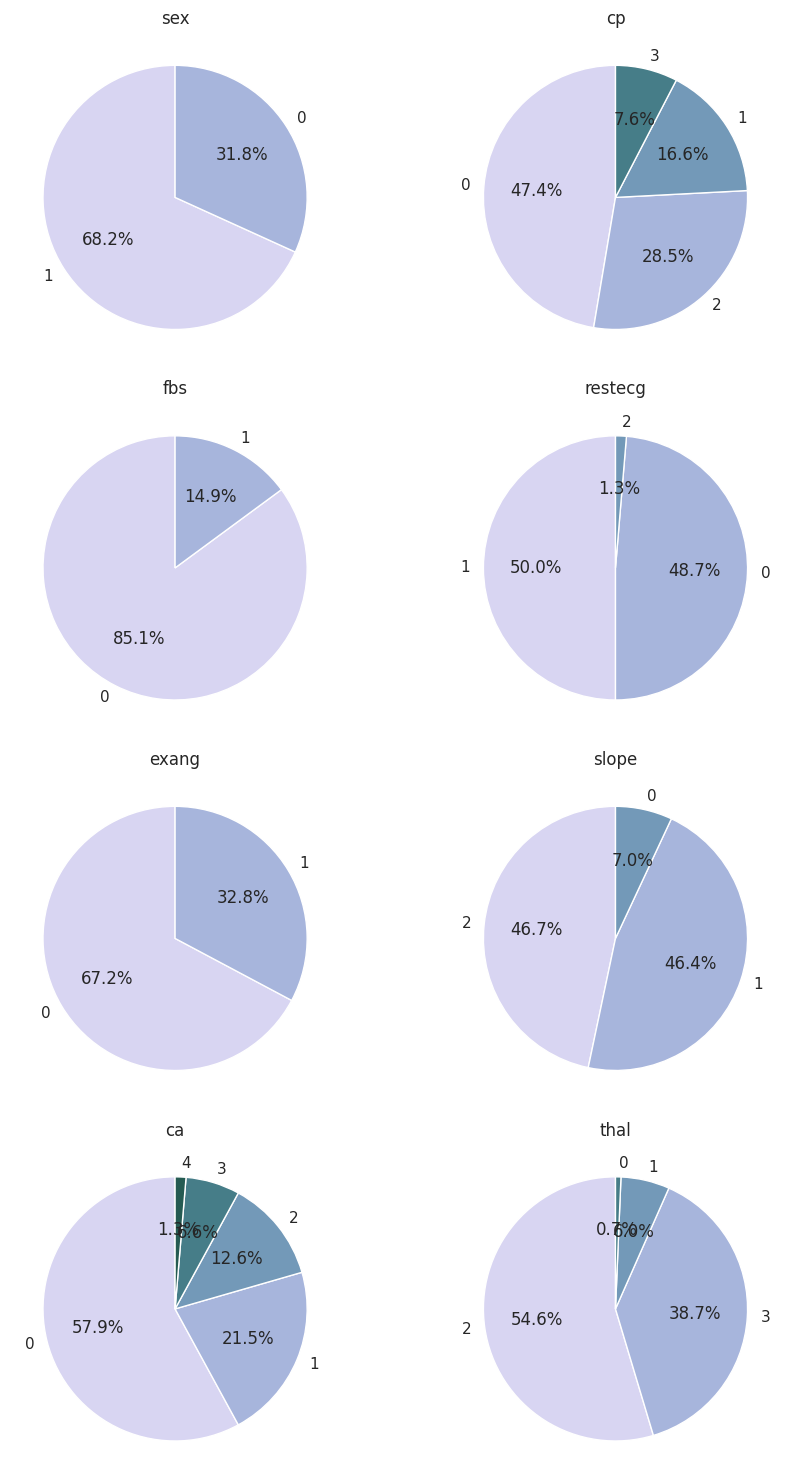

In [17]:
cat_features =['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(4, 2, figsize=(10,15))

for i, features in enumerate(cat_features):
    r,c = i //2, i % 2
    values = data[features].value_counts()
    axes[r,c].pie(values, labels= values.index, autopct = '%0.1f%%', colors = sns.cubehelix_palette(start =5), startangle= 90)
    axes[r,c].set_title(features)

plt.tight_layout()
plt.show()

In [18]:
import plotly.express as px

# Interactive age distribution
fig_age = px.histogram(data, x='age', title='Age Distribution', nbins=20)
fig_age.show()

# Interactive scatter plot of age vs. max heart rate
fig_scatter = px.scatter(data, x='age', y='thalach', color='target', title='Age vs. Max Heart Rate')
fig_scatter.show()

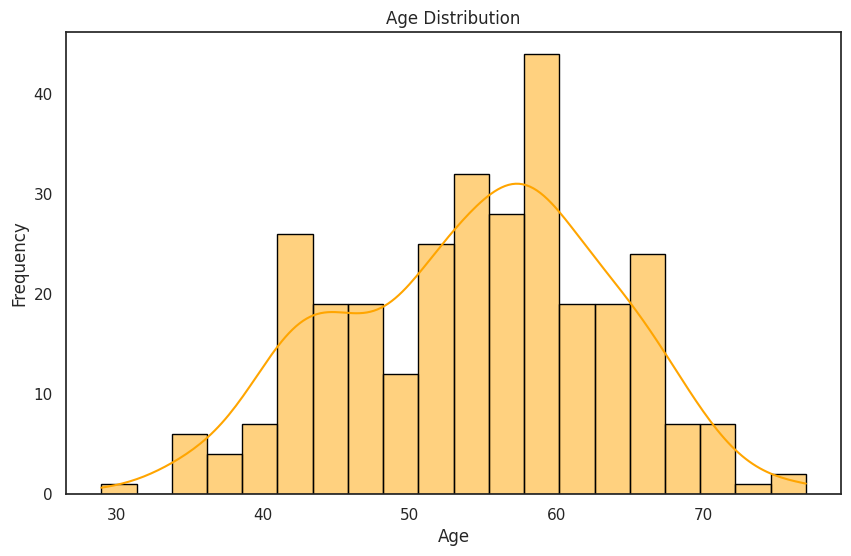

In [19]:
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.histplot(data['age'], bins=20, kde=True, color = 'orange', edgecolor= 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

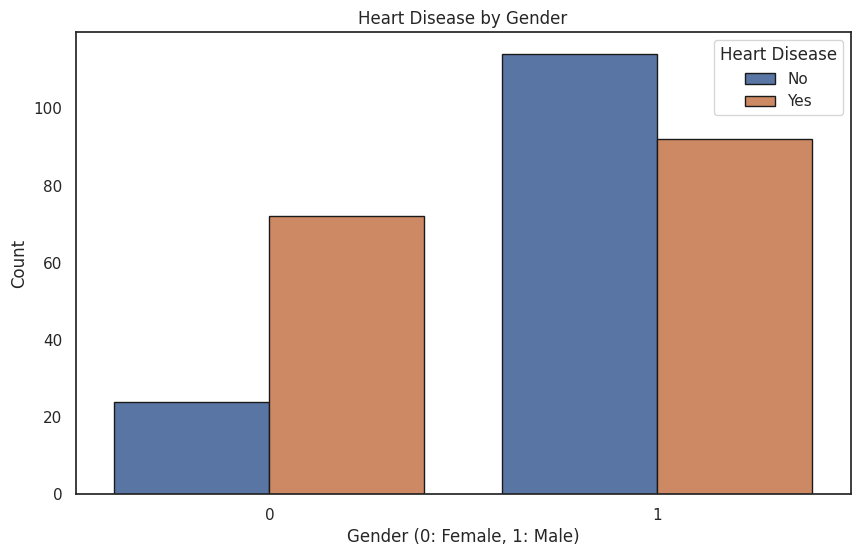

In [20]:
plt.figure(figsize=(10, 6))
sns.set_style('white')
sns.countplot(x='sex', hue='target', data=data, edgecolor= 'k')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

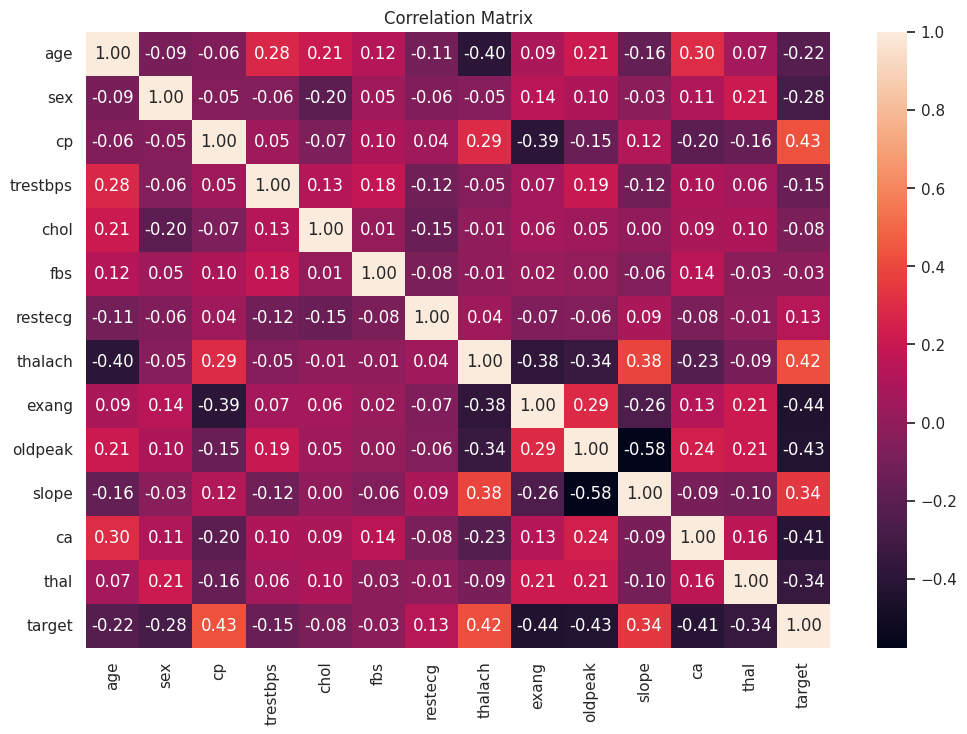

In [21]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

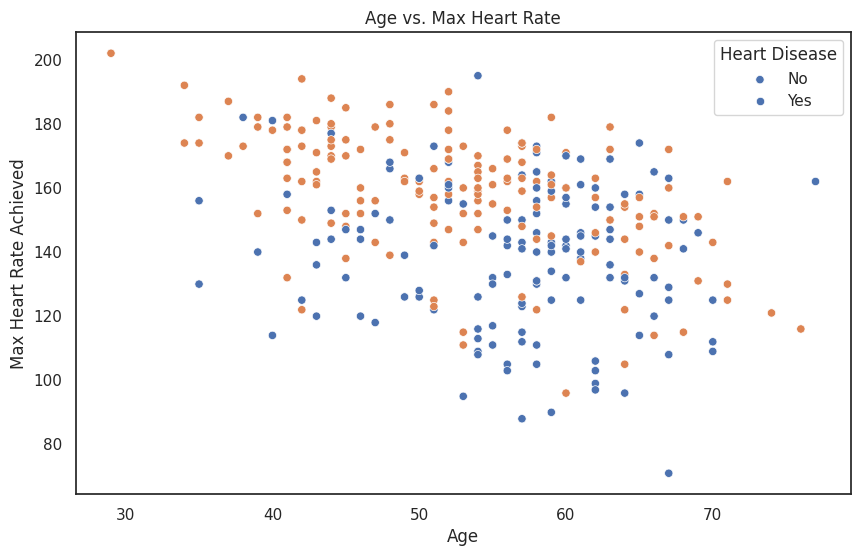

In [22]:
# Scatter plot of age vs. max heart rate, colored by heart disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data,)
plt.title('Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

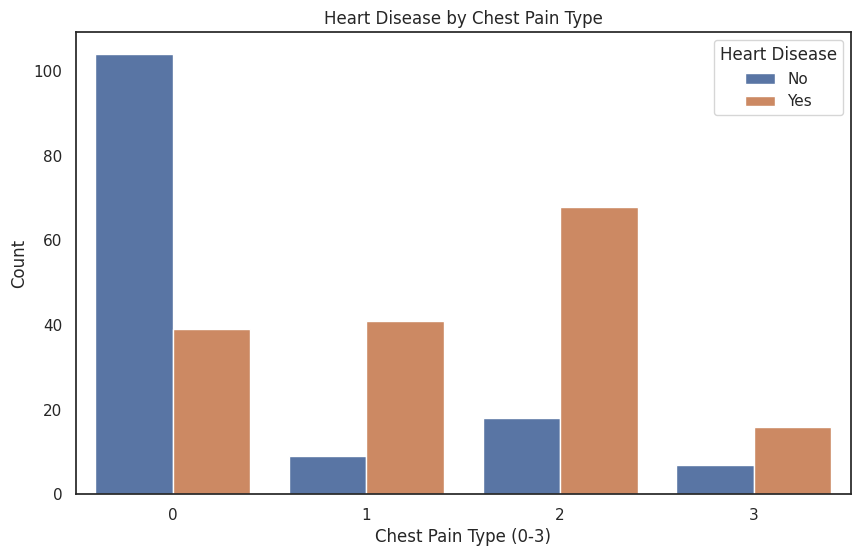

In [23]:
# Chest pain type analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

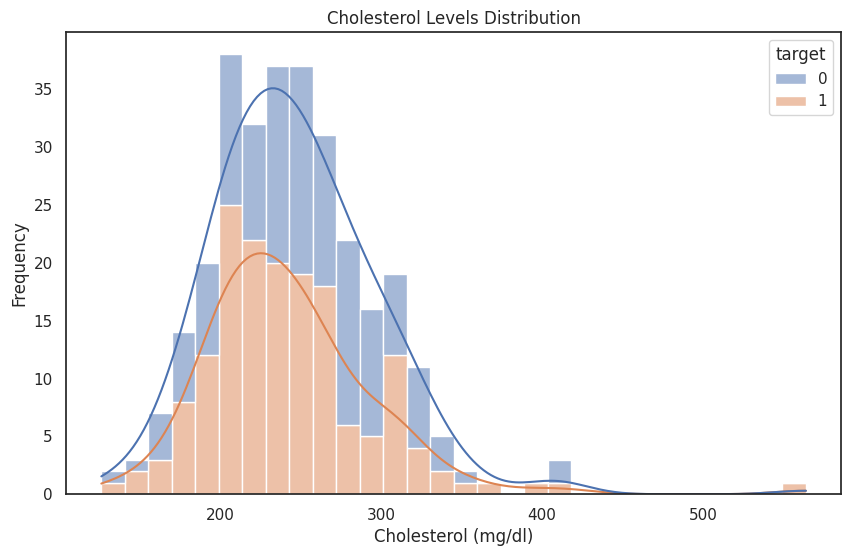

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x =data['chol'], bins=30, kde=True, hue=data['target'], multiple= 'stack')
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()

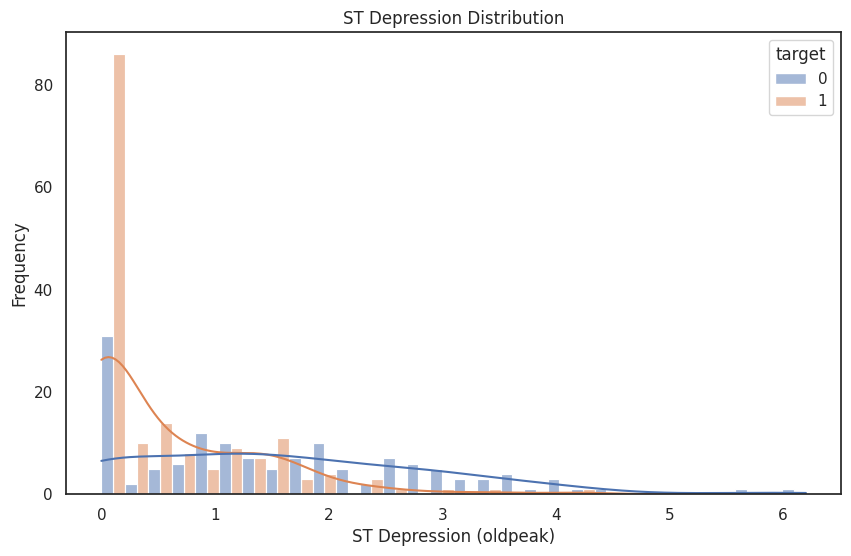

In [25]:
# ST depression analysis
plt.figure(figsize=(10, 6))
sns.histplot(data ,x= data['oldpeak'], bins=30, kde=True, hue=data['target'], multiple= 'dodge')
plt.title('ST Depression Distribution')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Frequency')
plt.show()

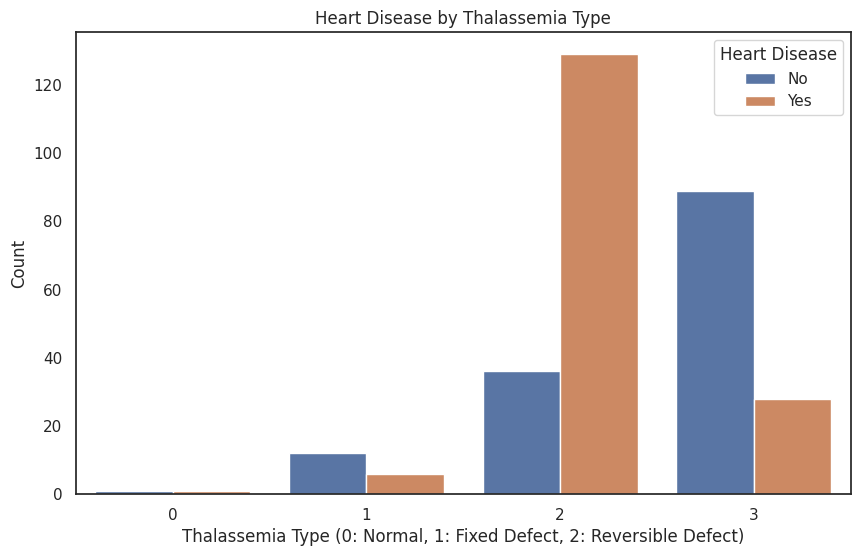

In [26]:
# Thalassemia analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='thal', hue='target', data=data)
plt.title('Heart Disease by Thalassemia Type')
plt.xlabel('Thalassemia Type (0: Normal, 1: Fixed Defect, 2: Reversible Defect)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()